# CVPPP Instance Test

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


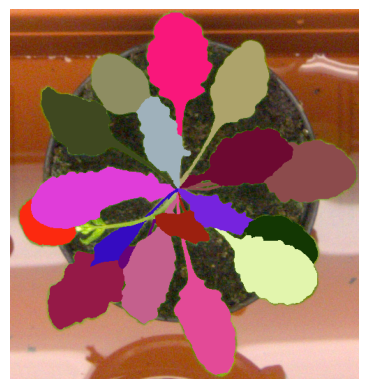

In [32]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils

# Paths
coco_json = "cvppp_a1_train.json"
images_dir = "./"  # folder with *_rgb.png

# Load COCO data
coco = COCO(coco_json)

# Pick a random image
img_ids = coco.getImgIds()
img_id = int(np.random.choice(img_ids))  # random ID
img_info = coco.loadImgs([img_id])[0]    # wrap ID in list
img_path = f"{images_dir}/{img_info['file_name']}"
image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

# Load annotations for this image
ann_ids = coco.getAnnIds(imgIds=img_info['id'])
anns = coco.loadAnns(ann_ids)

# Show image
plt.imshow(image)
plt.axis("off")

# Draw segmentations
for ann in anns:
    mask = maskUtils.decode(ann["segmentation"])
    # Overlay mask
    color = np.random.rand(3)
    image[mask == 1] = (color * 255).astype(np.uint8)
    plt.imshow(image)

plt.show()


# Mask Visualiser

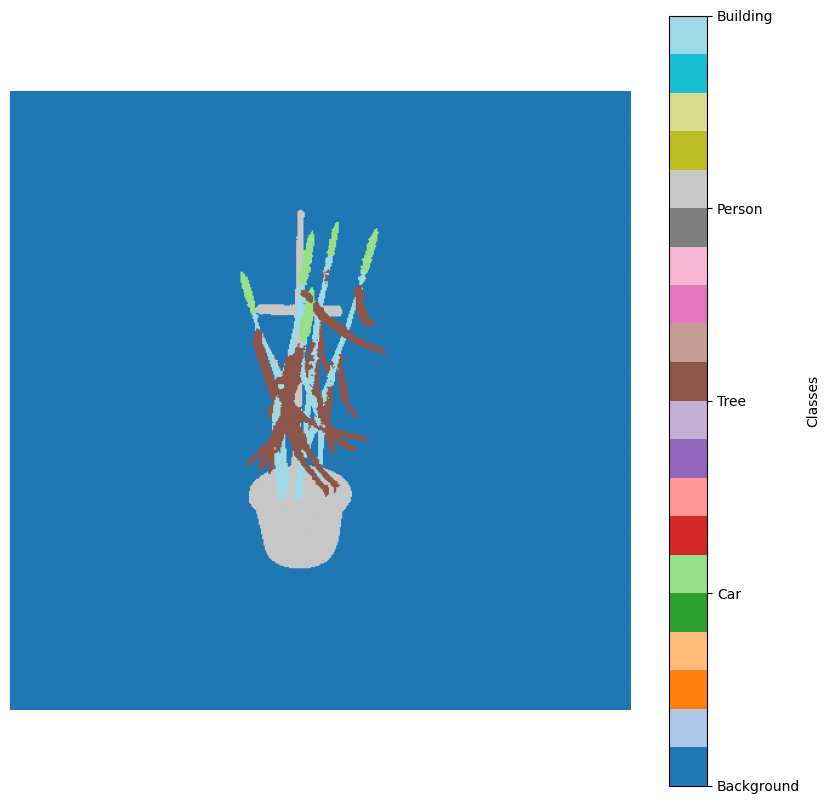

In [ ]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import albumentations as A

CLASS_COLORS = {
    0: (0, 0, 0),       # Background (black)
    1: (0, 255, 0),     # Leaf (green)
    2: (255, 165, 0),   # Pot (orange)
    3: (139, 69, 19),   # Stem (brown)
    4: (157, 0, 255),   # Stem (purple)
}
COLOR_TO_CLASS = {
    (0, 0, 0): 0,  # Background
    (1, 1, 1): 1,  # Leaf
    (2, 2, 2): 2,  # Pot
    (3, 3, 3): 3,  # Soil
    (4, 4, 4): 4   # Stem
}

def decode_mask(mask, class_colors):
    h, w = mask.shape
    color_mask = np.zeros((h, w, 3), dtype=np.uint8)

    for class_id, color in class_colors.items():
        color_mask[mask == class_id] = color

    return color_mask

def load_mask(path, color_to_class, class_colors, resize=(256, 256)):
    mask = Image.open(path).convert("L")
    mask = np.array(mask)

    print(np.unique(mask))

    transform = A.Compose([
        A.Resize(height=resize[0], width=resize[1])
    ])
    transformed = transform(image=mask)
    resized_mask = transformed["image"]

    # Sanitize class indices
    valid_classes = list(color_to_class.values())  # E.g. [0, 1, 2]
    max_class = max(valid_classes)

    resized_mask = np.clip(resized_mask, 0, max_class)

    tensor = torch.tensor(resized_mask, dtype=torch.long).unsqueeze(0)
    decoded = decode_mask(resized_mask, class_colors)

    return decoded, tensor


# decoded, _ = load_mask("93.png", color_to_class=COLOR_TO_CLASS, class_colors=CLASS_COLORS, resize=(2048, 2048))

C:\Users\jiansu\AppData\Local\Temp\ipykernel_50388\3750663740.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', n_classes)


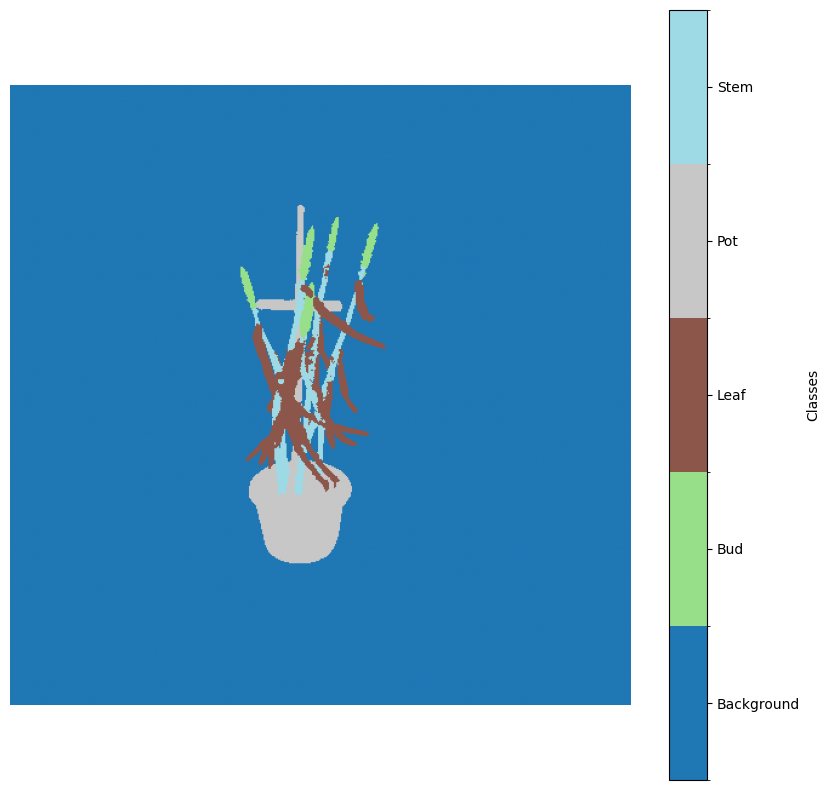

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

class_names = ['Background', 'Bud', 'Leaf', 'Pot', 'Stem']
n_classes = len(class_names)

plt.figure(figsize=(10, 10))
decoded = Image.open("93.png").convert("L")
cmap = plt.cm.get_cmap('tab20', n_classes)
norm = colors.BoundaryNorm(boundaries=np.arange(-0.5, n_classes + 0.5, 1), ncolors=n_classes)
im = plt.imshow(decoded, cmap=cmap, norm=norm)
plt.axis('off')

cbar = plt.colorbar(im, ticks=range(n_classes))
cbar.ax.set_yticklabels(class_names)
cbar.set_label('Classes')

In [2]:
import numpy as np
from PIL import Image

m = np.array(Image.open("63.png"))
print(m.shape)
print(len(m.shape))

(512, 512)
2


In [ ]:
import numpy as np
from PIL import Image

